<a href="https://colab.research.google.com/github/mili-b/PredictiveAnalytics/blob/main/CarsData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data

In [ ]:
cars = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/cars.csv')


In [ ]:
cars.head()

,price,maintenance,doors,persons,trunk_size,safety,target
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [ ]:
cars.tail()

,price,maintenance,doors,persons,trunk_size,safety,target
1723,low,low,5more,more,med,med,2
1724,low,low,5more,more,med,high,3
1725,low,low,5more,more,big,low,0
1726,low,low,5more,more,big,med,2
1727,low,low,5more,more,big,high,3


In [ ]:
cars.shape

(1728, 7)

In [ ]:
#feature variables are categorical
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        1728 non-null   object
 1   maintenance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   trunk_size   1728 non-null   object
 5   safety       1728 non-null   object
 6   target       1728 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 94.6+ KB


In [ ]:
cars['target'].unique()

array([0, 1, 3, 2])

In [ ]:
cars['price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
cars['maintenance'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
cars['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
cars['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [ ]:
cars['trunk_size'].unique()

array(['small', 'med', 'big'], dtype=object)

In [ ]:
cars['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [ ]:
#distributions - eveny split except for target variable

for column in cars.columns:
    print(cars[column].value_counts(), '\n') 

vhigh    432
high     432
med      432
low      432
Name: price, dtype: int64 

vhigh    432
high     432
med      432
low      432
Name: maintenance, dtype: int64 

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64 

2       576
4       576
more    576
Name: persons, dtype: int64 

small    576
med      576
big      576
Name: trunk_size, dtype: int64 

low     576
med     576
high    576
Name: safety, dtype: int64 

0    1210
1     384
2      69
3      65
Name: target, dtype: int64 



### Reduce target categories from 4 to 2

In [ ]:
#for the target variable, oversampling may be an issue
#convert into two classes 0 (1210) and sum of 1,2,3 (518)

#replace '2', '3' with 1
cars['target'].replace((2, 3), (1, 1), inplace=True)


In [ ]:
#target reduced from 4 to 2 categories
cars['target'].value_counts()

0    1210
1     518
Name: target, dtype: int64

### Convert feature variables

In [ ]:
# separate into input and output columns

X = cars.drop('target', axis=1)
y = cars['target']

In [ ]:
#split data before converting

from sklearn.model_selection import train_test_split

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# ordinal encode input variables
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

In [ ]:
X_train, X_train.shape

(array([[1., 0., 3., 1., 1., 1.],
        [0., 1., 3., 1., 1., 0.],
        [0., 3., 0., 1., 2., 0.],
        ...,
        [2., 2., 0., 1., 0., 2.],
        [3., 2., 0., 2., 2., 2.],
        [2., 0., 3., 0., 0., 0.]]), (1209, 6))

In [ ]:
y_train, y_train.shape

(1497    0
 851     1
 443     0
 1631    1
 1621    0
        ..
 715     1
 905     1
 1096    1
 235     0
 1061    0
 Name: target, Length: 1209, dtype: int64, (1209,))

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# define the model
logmodel = LogisticRegression()


In [ ]:
# fit on the training set
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# predict on test set
predictions = logmodel.predict(X_test)

In [ ]:
# evaluate predictions
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       368
           1       0.51      0.37      0.43       151

    accuracy                           0.71       519
   macro avg       0.64      0.61      0.62       519
weighted avg       0.69      0.71      0.70       519



In [ ]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("0", sum(pp!=0))
print("1", sum(pp==0))

0.7148362235067437
0 109
1 410


#### Logistic regression yields 71% accuracy - stayed steady at 71-72 percent with various test sample sizes

# KNN Model

In [ ]:
#standardize the variables
#from sklearn.preprocessing import StandardScaler
#note - feature variables range from 0-3 - so not scale

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[336  32]
 [ 31 120]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       368
           1       0.79      0.79      0.79       151

    accuracy                           0.88       519
   macro avg       0.85      0.85      0.85       519
weighted avg       0.88      0.88      0.88       519



In [ ]:
#CHOOSING A K VALUE
#create a loop so that The algorithm trains various KNN models with 
#different k values, then keep track of the error_rate 
#for each of the models with a list.

error_rate = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

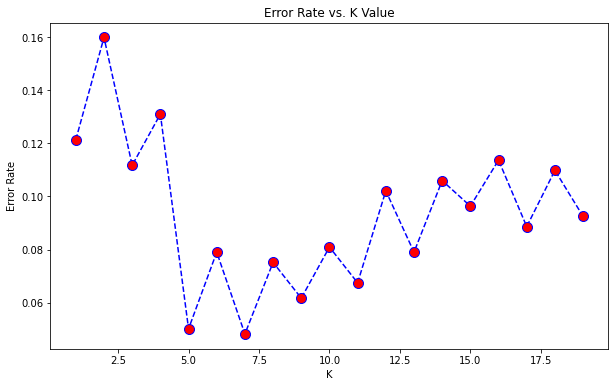

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:

#WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[364   4]
 [ 22 129]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.97       368
           1       0.97      0.85      0.91       151

    accuracy                           0.95       519
   macro avg       0.96      0.92      0.94       519
weighted avg       0.95      0.95      0.95       519



# Decision Trees and Random Forest

### Decision Trees

In [ ]:

from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       368
           1       0.97      0.97      0.97       151

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



In [ ]:
print(confusion_matrix(y_test,predictions))

[[364   4]
 [  5 146]]


### Random Forests

In [ ]:

from sklearn.ensemble import RandomForestClassifier

In [ ]:
rforest = RandomForestClassifier(n_estimators = 300)

In [ ]:
rforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_predict = rforest.predict(X_test)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       368
           1       0.97      0.98      0.97       151

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



In [ ]:
print(confusion_matrix(y_test,y_predict))


[[363   5]
 [  3 148]]


# SVM

In [ ]:

from sklearn.svm import SVC

In [ ]:

model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[361   7]
 [ 28 123]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       368
           1       0.95      0.81      0.88       151

    accuracy                           0.93       519
   macro avg       0.94      0.90      0.91       519
weighted avg       0.93      0.93      0.93       519



### all the models (KNN, decision trees, random forests, SVM) performed with over 90% accuracy, except for logistic regression which performed at 71% accuracy.

### random forest did the best at 99%, followed by decision trees at 98%, then KNN at 95% for k=8, and SVM at 93%